In [1]:
start_links = ['https://en.wikipedia.org/wiki/Antiderivative',
'https://en.wikipedia.org/wiki/Hyperbola',
'https://en.wikipedia.org/wiki/Area_under_the_curve_(pharmacokinetics)',
'https://en.wikipedia.org/wiki/Vector_(mathematics_and_physics)',
'https://en.wikipedia.org/wiki/Parabola',
'https://en.wikipedia.org/wiki/Logarithm',
'https://en.wikipedia.org/wiki/Harmonic_progression',
'https://en.wikipedia.org/wiki/De_Morgan%27s_laws',
'https://en.wikipedia.org/wiki/Even_and_odd_functions',
'https://en.wikipedia.org/wiki/Floor_and_ceiling_functions',
'https://en.wikipedia.org/wiki/Transpose',
'https://en.wikipedia.org/wiki/Chord_(geometry)',
'https://en.wikipedia.org/wiki/Inverse_trigonometric_functions',
'https://en.wikipedia.org/wiki/Parametric_equation',
'https://en.wikipedia.org/wiki/Director_circle',
'https://en.wikipedia.org/wiki/Coplanarity',
'https://en.wikipedia.org/wiki/Centroid',
'https://en.wikipedia.org/wiki/Altitude_(triangle)',
'https://en.wikipedia.org/wiki/Function_composition',
'https://en.wikipedia.org/wiki/Periodic_function',
'https://en.wikipedia.org/wiki/Dihedral_angle',
'https://en.wikipedia.org/wiki/Diophantine_geometry',
'https://en.wikipedia.org/wiki/Sampling_(statistics)#Simple_random_sampling',
'https://en.wikipedia.org/wiki/Minimax',
'https://en.wikipedia.org/wiki/Quantile_function',
'https://en.wikipedia.org/wiki/Karl_Weierstrass',
'https://en.wikipedia.org/wiki/Augustin-Louis_Cauchy']

start_labels = [3,3,3,1,2,1,1,1,1,1,2,1,3,2,2,2,1,3,3,2,3,0,0,0,0,0,0]
# 1 is beginner, 2 is intermediate, 3 is advanced

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
class Node:
  def __init__(self,link,label=None):
    self.link = link # to store the link 
    self.label = label # to store the label
    self.neighbours = [] # to store the neighbours
    # to store the labels that come to this node in propagation step
    # and then assign to it the most frequent one
    self.label_options = [] 

    self.name = link.split('/')[-1] # can be useful if we are displaying the nodes
    # neighbours is a list of nodes

unique_links = {} # to store all unique links and their nodes

In [4]:
# creating and storing initial nodes
start_nodes = [Node(lnk,lbl) for lnk,lbl in zip(start_links,start_labels)]
for n in start_nodes:
  unique_links[n.link] = n

# helper function
def getLinks(link):
  # returns a list of all links present on the page of the passed link
  r = requests.get(link)
  soup = BeautifulSoup(r.content, 'html5lib')
  return ['https://en.wikipedia.org/'+i['href'] for i in soup.find_all('a',href=True) if i['href'].startswith("/wiki")]

In [5]:
bfs_queue = [] # Queue to carry out bfs

# add the initial nodes to the queue
for s in start_nodes:
  bfs_queue.append(s) 

# testing on 1000 counts first -----------------> 10 minutes time, 76,162 nodes collected
# testing on 1500 counts first -----------------> 13 minutes time, 1,26,584 nodes collected
count = 1500 
for node in bfs_queue:

  count-=1 # testing
  if count==0:break # testing
  #if len(bfs_queue)==100000:break

  links = getLinks(node.link)
  neighbours = [] # store neighbours of the node
  for lnk in links:
    if lnk in unique_links:
      # Do nothing if link already explored
      #print("Already present")
      pass
    else:
      new = Node(lnk)
      bfs_queue.append(new) # add this node to queue
      unique_links[lnk] = new # also add to unique_links dictionary
    # here I am ensuring that no link is repeated but neighbours can be repeated
      
  for lk in links:
    neighbours.append(unique_links[lk])
  node.neighbours = neighbours

In [6]:
# helper function
def stat():
  global bfs_queue,unique_links
  print("Length of bfs_queue:",len(bfs_queue))
  print("Length of unique_links:",len(unique_links))

In [7]:
stat()

Length of bfs_queue: 126660
Length of unique_links: 126660


In [ ]:
from collections import Counter
import numpy as np

In [ ]:
# Now let us try to propagate the labels using the Label Propagation method

while True:
  # Loop until unlabelled nodes are 0, ie till all nodes get a label
  unlabelled = 0
  for lnk in unique_links:
    node = unique_links[lnk]

    if node.label is not None:
      #print(node.label,node.neighbours)
      for n in node.neighbours:
        #print("n.label->",n.label)
        if n.label is None:
          unlabelled+=1
          n.label_options.append(node.label)

  for lk in unique_links:
    node = unique_links[lk]
    if node.label is None: # can remove this condition, so that we update all nodes everytime, to get better results
      node.label = Counter(node.label_options).most_common(1)[0][0]

  print("Number of unlabelled nodes:",unlabelled)
  if unlabelled==0:break

  ask = input("Continue?")
  if ask!='y':break

Number of unlabelled nodes: 322115
Continue?y
Number of unlabelled nodes: 0


In [ ]:
def ulb():
  c = 0
  for l in unique_links:
    if unique_links[l].label==None:c+=1
  return "Unlabelled nodes are:"+str(c)

In [ ]:
ulb()

'Unlabelled nodes are:0'

In [ ]:
def counts():
  c1 = 0
  c1 = 0
  c2 = 0
  c3 = 0
  c4 = 0
  for l in unique_links:
    lb = unique_links[l].label
    if lb == 1:c1+=1
    if lb == 2:c2+=1
    if lb == 3:c3+=1
    if lb == 0:c4+=1
  print("Beginner:",c1)
  print("Intermediate:",c2)
  print("Advanced:",c3)
  print("Irrelevant:",c4)

In [ ]:
counts()

Beginner: 58559
Intermediate: 22486
Advanced: 40619
Irrelevant: 4920


In [ ]:
import pandas as pd
pages = pd.DataFrame(columns=['Name','Link','Label'])
pages['Name'] = [n.name for n in unique_links.values()]
pages['Link'] = [n.link for n in unique_links.values()]
pages['Label'] = [n.label for n in unique_links.values()]

In [ ]:
pages.tail()

,Name,Link,Label
126579,Category:Mathematical_databases,https://en.wikipedia.org//wiki/Category:Mathem...,0
126580,Category:Publications_established_in_1931,https://en.wikipedia.org//wiki/Category:Public...,0
126581,Talk:Zentralblatt_MATH,https://en.wikipedia.org//wiki/Talk:Zentralbla...,0
126582,Zentralblatt_MATH,https://en.wikipedia.org//wiki/Special:WhatLin...,0
126583,Zentralblatt_MATH,https://en.wikipedia.org//wiki/Special:RecentC...,0


In [ ]:
pages.to_csv("/content/drive/MyDrive/Semester4/DS250/Wikipedia/pages.csv")

In [ ]:
edges = pd.DataFrame(columns=['From','To'])
frm = []
to = []
frmto = []
c = 0
for lnk in unique_links:
  c+=1
  node = unique_links[lnk]

  for n in node.neighbours:
    # frm.append(lnk)
    # to.append(n.link)
    frmto.append((lnk,n.link))
print(c)

126584


In [ ]:
print(len(frm),len(to))

511993 511993


In [ ]:
edges['From'] = [n[0] for n in frmto]#frm
edges['To'] = [n[1] for n in frmto]#to
edges.to_csv("/content/drive/MyDrive/Semester4/DS250/Wikipedia/edges.csv")

In [ ]:
edges

,From,To
0,https://en.wikipedia.org/wiki/Antiderivative,https://en.wikipedia.org//wiki/Antiderivative_...
1,https://en.wikipedia.org/wiki/Antiderivative,https://en.wikipedia.org//wiki/Lists_of_integrals
2,https://en.wikipedia.org/wiki/Antiderivative,https://en.wikipedia.org//wiki/Calculus
3,https://en.wikipedia.org/wiki/Antiderivative,https://en.wikipedia.org//wiki/Fundamental_the...
4,https://en.wikipedia.org/wiki/Antiderivative,https://en.wikipedia.org//wiki/Leibniz_integra...
...,...,...
511988,https://en.wikipedia.org//wiki/Special:BookSou...,https://en.wikipedia.org//wiki/Wikipedia:File_...
511989,https://en.wikipedia.org//wiki/Special:BookSou...,https://en.wikipedia.org//wiki/Wikipedia:File_...
511990,https://en.wikipedia.org//wiki/Special:BookSou...,https://en.wikipedia.org//wiki/Special:Special...
511991,https://en.wikipedia.org//wiki/Special:BookSou...,https://en.wikipedia.org//wiki/Wikipedia:About


In [ ]:
###-------------Centrality measures----------------------###

In [25]:
# degree centrality and degree distribution
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
degrees = {}
for node in bfs_queue:
  degrees[node] = len(node.neighbours)

deg_centrality = {} # just use this dictionary to find degree centrality of any link
for node in bfs_queue:
  deg_centrality[node.link] = len(node.neighbours)

Text(0, 0.5, 'Degrees')

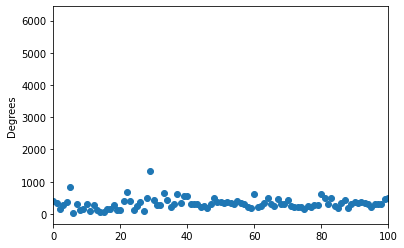

In [29]:
plt.scatter(list(range(len(bfs_queue))),degrees.values())
plt.xlim(0,100)
plt.ylabel("Degrees")

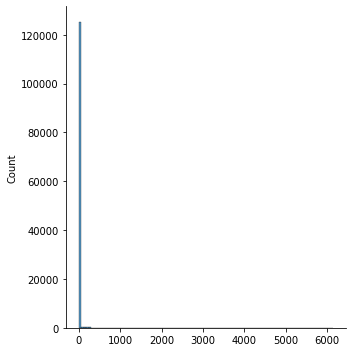

In [35]:
sns.displot(list(degrees.values()),bins=100)

In [36]:
list(degrees.values()).count(150) # 6 nodes have degree 150

6

In [40]:
deg_counts = {}
for n in set(degrees.values()):
  deg_counts[n] = list(degrees.values()).count(n)

In [39]:
len(set(degrees.values())),len(degrees.values())

(587, 126660)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50.0)

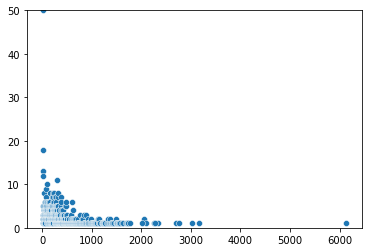

In [51]:
sns.scatterplot(list(deg_counts.keys()),list(deg_counts.values()))
plt.ylim(0,50)
# We can see that the degree distribution follows power law.

In [ ]:
# Let us randomly select 1000 nodes from bfs_queue and then try out
# centrality measures on them in neo4j

In [73]:
import random
ran_100 = random.sample(bfs_queue,100)

for n in ran_100:
  for nn in n.neighbours:
    ran_100.append(nn)

In [54]:
import pandas as pd

In [55]:
pages = pd.read_csv("/content/drive/MyDrive/Semester4/DS250/Wikipedia/pages.csv")

In [56]:
pages.head()

,Unnamed: 0,Name,Link,Label
0,0,Antiderivative,https://en.wikipedia.org/wiki/Antiderivative,3
1,1,Hyperbola,https://en.wikipedia.org/wiki/Hyperbola,3
2,2,Area_under_the_curve_(pharmacokinetics),https://en.wikipedia.org/wiki/Area_under_the_c...,3
3,3,Vector_(mathematics_and_physics),https://en.wikipedia.org/wiki/Vector_(mathemat...,1
4,4,Parabola,https://en.wikipedia.org/wiki/Parabola,2


In [57]:
len(pages)

126584

In [82]:
len(pages['Link'].unique())

126584

In [66]:
label = pages.loc[pages['Link']==pages.iloc[3]['Link']]['Label']
label.values[0]

1

In [74]:
id = {}
for i,n in enumerate(ran_100):
  id[n] = i+1

In [91]:
st = "CREATE "
df = pages.copy()
for h in ran_100:
  label = df.loc[df['Link']==h.link]['Label']
  # print(label)
  # print(h.link)
  try:
    st+="(n"+str(id[h])+":NODE{link:'"+h.link+"'"+",LABEL:"+str(label.values[0])+"}"+"),"+"\n"
  except:
    continue
st = st.rstrip(",")
st+="\n"
#print(st)
rel = 0
for n in ran_100:
  for nn in n.neighbours:
    if n.link in pages['Link']:
      rel+=1
      st+="(n"+str(id[nn])+")"+"-[r"+str(rel)+":NEIGHBOR_OF]->"+"(n"+str(id[n])+"),"+"\n"
st = st.rstrip(",")
st+=";"
print(st)

CREATE (n1:NODE{link:'https://en.wikipedia.org//wiki/File:Trigonometrija-graf.png',LABEL:3}),
(n2:NODE{link:'https://en.wikipedia.org//wiki/File:Ab_major_scale.png',LABEL:1}),
(n3:NODE{link:'https://en.wikipedia.org//wiki/Supershear_earthquake',LABEL:1}),
(n4:NODE{link:'https://en.wikipedia.org//wiki/Dietrich_von_Hildebrand',LABEL:2}),
(n5:NODE{link:'https://en.wikipedia.org//wiki/Nine_Chapters_on_the_Mathematical_Art',LABEL:1}),
(n6:NODE{link:'https://en.wikipedia.org//wiki/Salvarsan',LABEL:3}),
(n7:NODE{link:'https://en.wikipedia.org//wiki/Paul_%C3%89mile_Appell',LABEL:1}),
(n8:NODE{link:'https://en.wikipedia.org//wiki/Solomon_Islands_campaign',LABEL:1}),
(n9:NODE{link:'https://en.wikipedia.org//wiki/Pregolya',LABEL:0}),
(n10:NODE{link:'https://en.wikipedia.org//wiki/Special:RecentChangesLinked/Envelope_(mathematics)',LABEL:3}),
(n11:NODE{link:'https://en.wikipedia.org//wiki/19th_Waffen_Grenadier_Division_of_the_SS_(2nd_Latvian)',LABEL:0}),
(n12:NODE{link:'https://en.wikipedia.org//w